In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
import seaborn as sns
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.cluster

import os
from yellowbrick.cluster import SilhouetteVisualizer

import math
import scipy

In [2]:
def ts_cluster_visualization(y_pred, df, n_clusters, plot_title):
    ts_size = df.shape[1]
    ts_max = df.max()
    plt.figure()
    for cluster in range(n_clusters):
        plt.subplot(4, math.ceil(n_clusters/4), cluster+1)
        for ts in df[y_pred == cluster]:
            plt.plot(ts.ravel(), "k-", alpha=.2)
        plt.plot(np.mean(df[y_pred == cluster], axis=0), "r-")
        plt.xlim(0, ts_size)
        plt.ylim(0, ts_max)
        plt.text(0.55, 0.35,'Cluster %d' % (cluster),
                 transform=plt.gca().transAxes)
        if cluster == 1:
            plt.title(plot_title)      
    plt.tight_layout()
    plt.show()

In [3]:
bank_DAE = pd.read_csv("extracted_features/bank_reserves_DAE.csv")

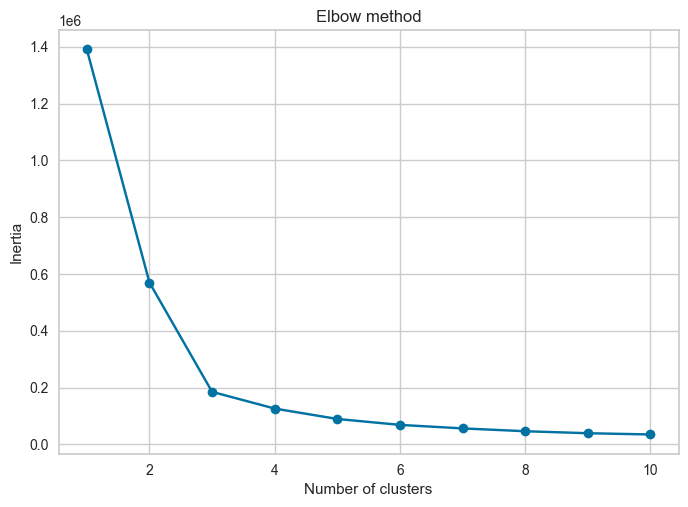

In [4]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(bank_DAE)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=12)
pred = kmeans.fit(bank_DAE)

In [15]:
pred.labels_

array([5, 2, 0, ..., 7, 6, 1])

In [16]:
bank_poor_ts = pd.read_csv('SimData/bank_reserves_outputs_poor.csv')
X_train_poor = to_time_series_dataset(bank_poor_ts)

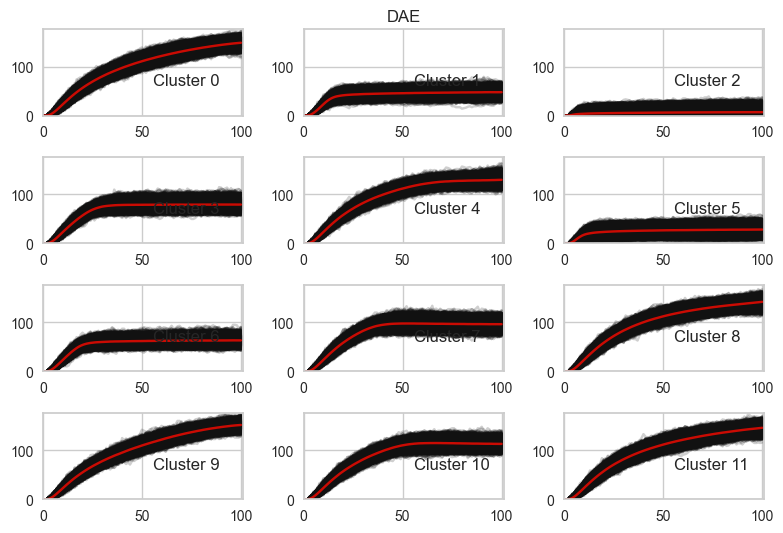

In [17]:
ts_cluster_visualization(pred.labels_, X_train_poor, 12, 'DAE')

In [18]:
def ts_cluster_distance(y_pred, df, n_clusters, distance_measure):
    distances = list()
    for cluster in range(n_clusters):
        cluster_center = np.mean(df[y_pred == cluster], axis=0)
        for ts in df[y_pred == cluster]:
            if(distance_measure == "Euclidean"):
                diff = np.sqrt(np.sum((ts.ravel() - cluster_center)**2))
                distances.append(diff)
    return np.mean(distances)

In [19]:
ts_cluster_distance(pred.labels_, X_train_poor, 12, 'Euclidean')

3992.5255824746196